In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate

# Lettura DataFrame

In [2]:
file_path = 'C:\\Users\\mirko\\PycharmProjects\\Merging\\merged_data.csv'
df = pd.read_csv(file_path)
df = df.drop(['author_name', 'project_name'], axis=1)
df

,author_timezone,author_code_churn,author_refactoring_density,author_commits,author_time,project_files,project_contributors,project_timezones,project_commits,project_age,project_stars,project_refactoring_density
0,Less,More,Most,More,More,Less,More,More,Less,Most,More,Least
1,Less,More,Most,More,More,Less,More,More,Less,Most,More,Least
2,Less,More,Most,More,More,Less,More,More,Less,Most,More,Least
3,Less,More,Most,More,More,Less,More,More,Less,Most,More,Least
4,Less,More,Most,More,More,Less,More,More,Less,Most,More,Least
...,...,...,...,...,...,...,...,...,...,...,...,...
14283,Least,Least,Least,Least,Most,More,Least,Least,More,More,Least,Least
14284,Least,Least,Least,Least,Most,More,Least,Least,More,More,Least,Least
14285,Least,Least,Least,Least,Most,More,Least,Least,More,More,Least,Least
14286,Least,Least,Least,Least,Most,More,Least,Least,More,More,Least,Least


# Info DataFrame

In [3]:
print(df.dtypes)
print("\n\n\n")
print(df.describe())
print("\n\n\n")
print(df.isna().sum())
df = df.dropna()
print("\n\n\n")
print(df.isna().sum())

author_timezone                object
author_code_churn              object
author_refactoring_density     object
author_commits                 object
author_time                    object
project_files                  object
project_contributors           object
project_timezones              object
project_commits                object
project_age                    object
project_stars                  object
project_refactoring_density    object
dtype: object




       author_timezone author_code_churn author_refactoring_density  \
count            14288             14288                      14288   
unique               2                 3                          3   
top               Less             Least                      Least   
freq              7545              6743                       6743   

       author_commits author_time project_files project_contributors  \
count           14288       14288         14156                14156   
unique              3     

# Histplot

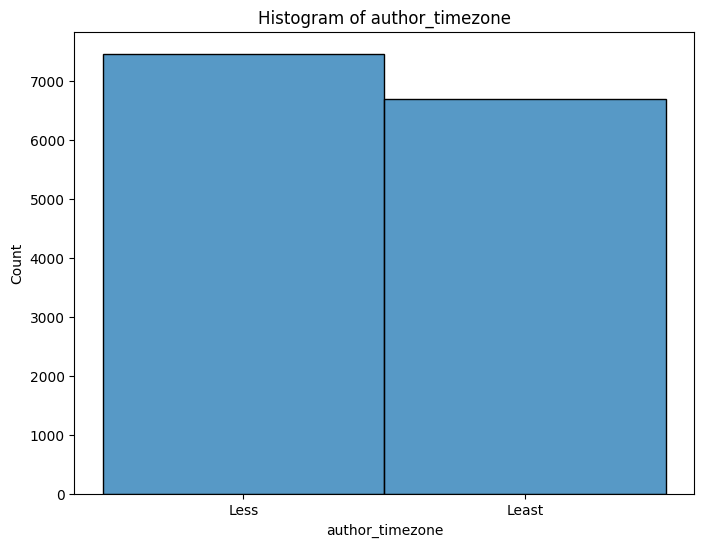

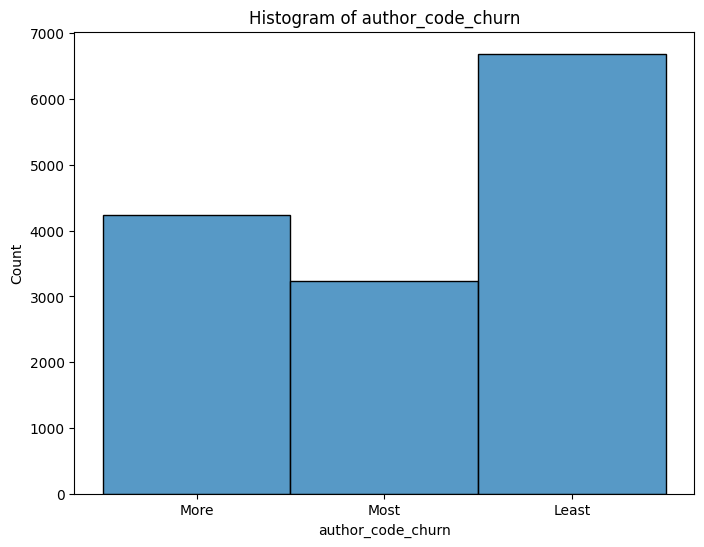

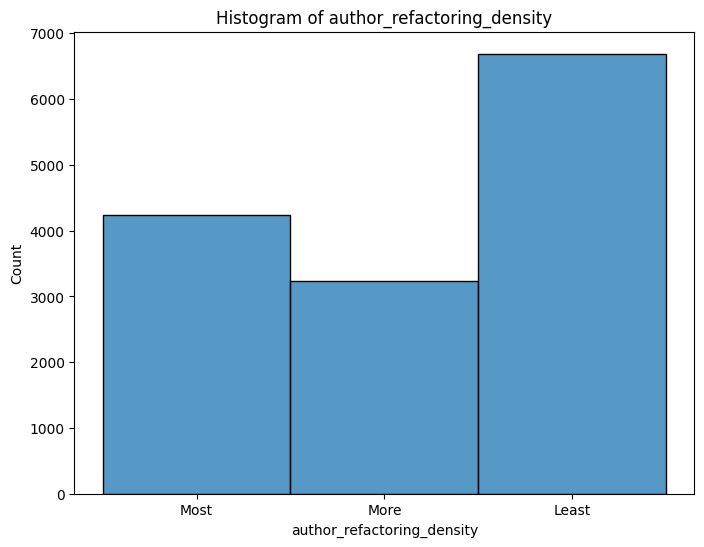

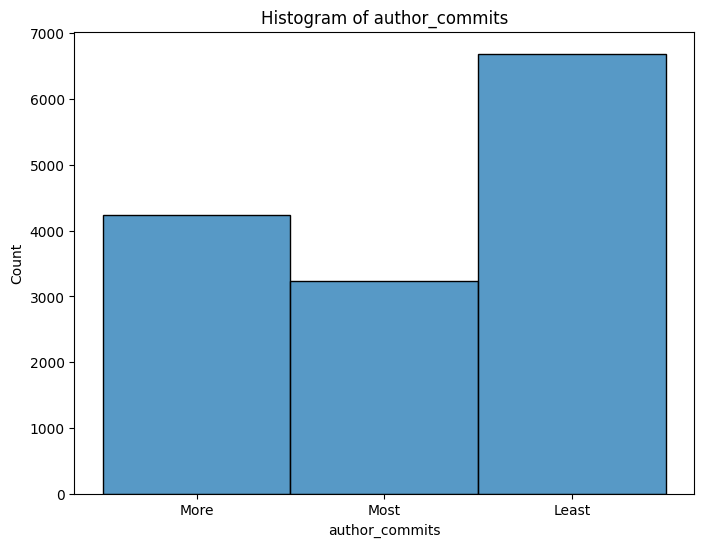

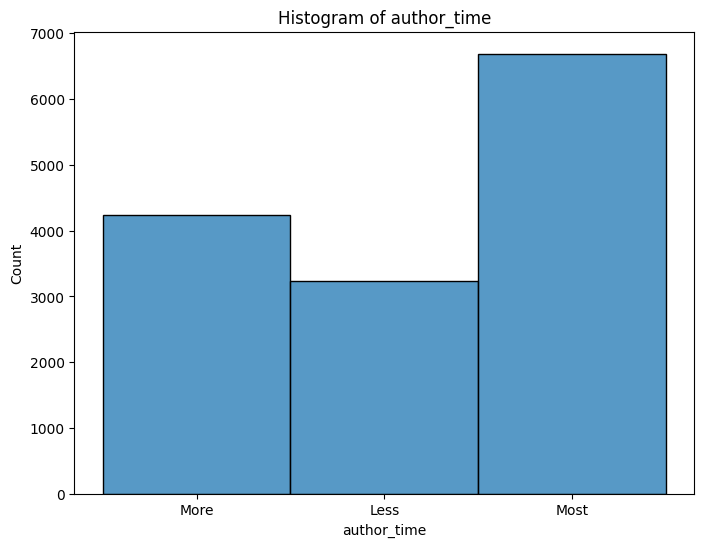

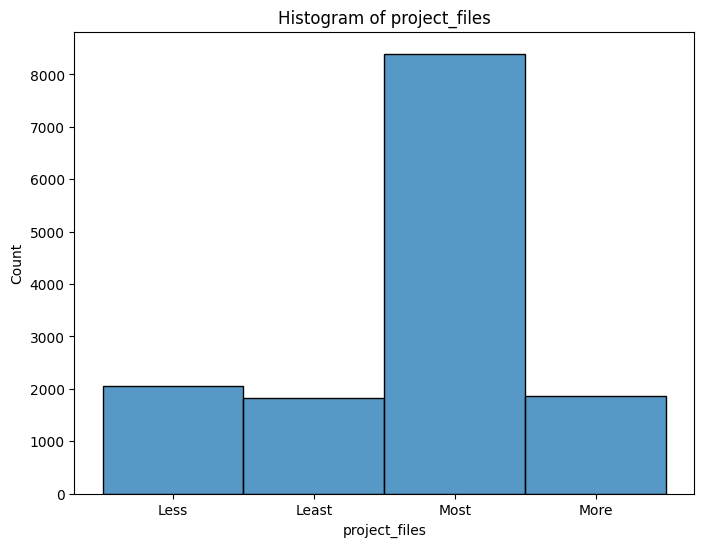

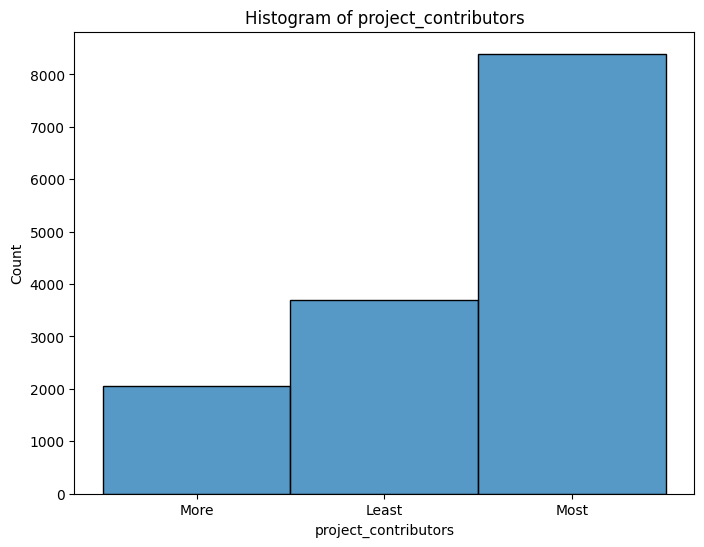

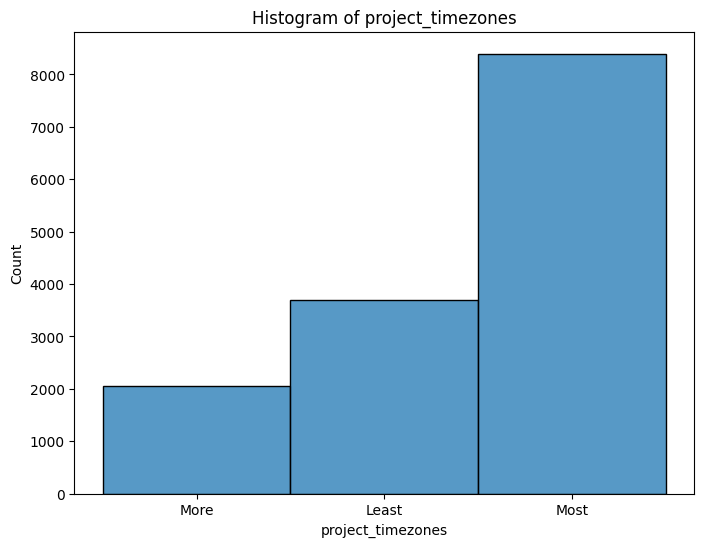

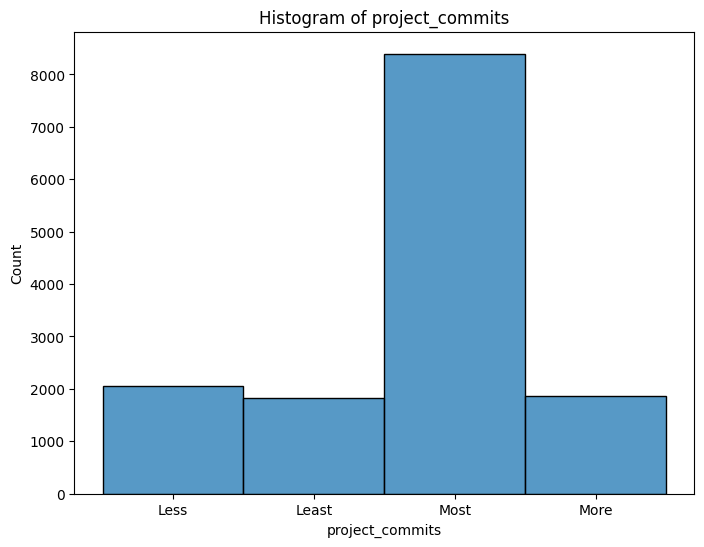

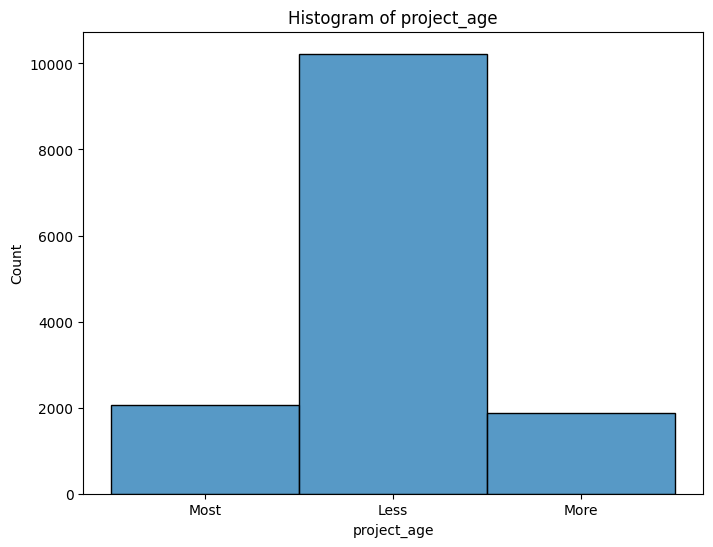

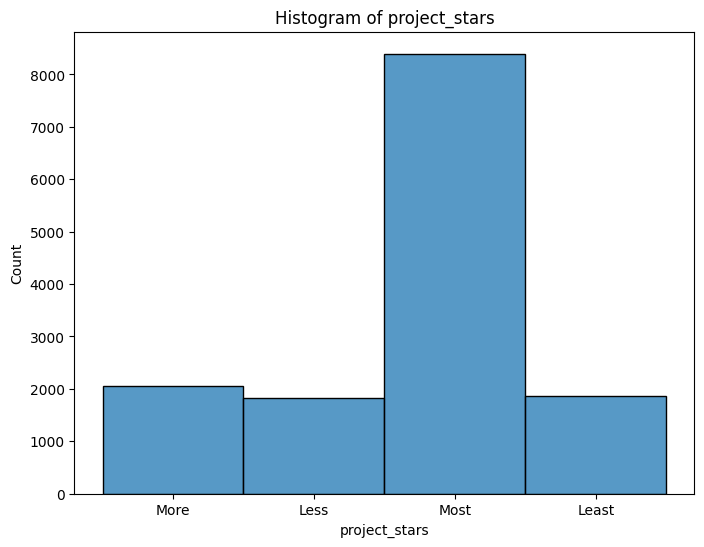

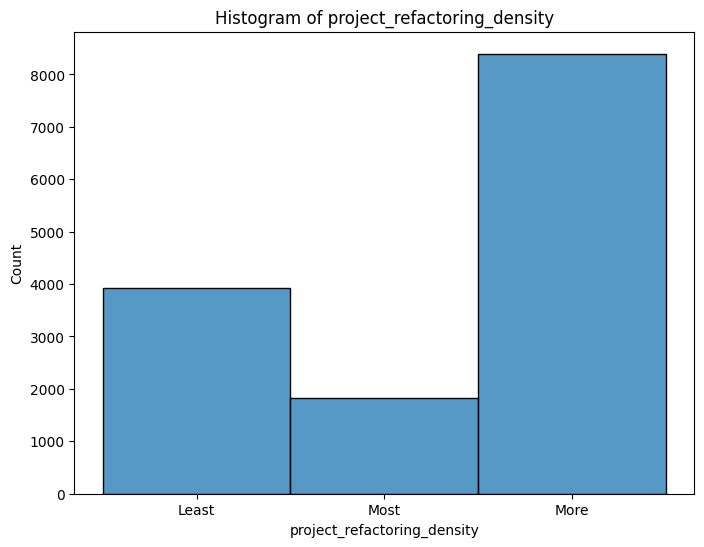

In [4]:
def plot_histograms(dataframe):
    for column_name in dataframe.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(dataframe[column_name])
        plt.title(f'Histogram of {column_name}')
        plt.show()
        
plot_histograms(df)

# Label Encoding

In [5]:
encoded_df = df.copy()
ordinal_encoder = OrdinalEncoder(categories=[['Least', 'Less', 'More', 'Most']])
for column in encoded_df.columns:
    encoded_df[column] = ordinal_encoder.fit_transform(encoded_df[[column]])
encoded_df

,author_timezone,author_code_churn,author_refactoring_density,author_commits,author_time,project_files,project_contributors,project_timezones,project_commits,project_age,project_stars,project_refactoring_density
0,1.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0
1,1.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0
2,1.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0
3,1.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0
4,1.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14283,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0
14284,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0
14285,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0
14286,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0


# Matrice di correlazione

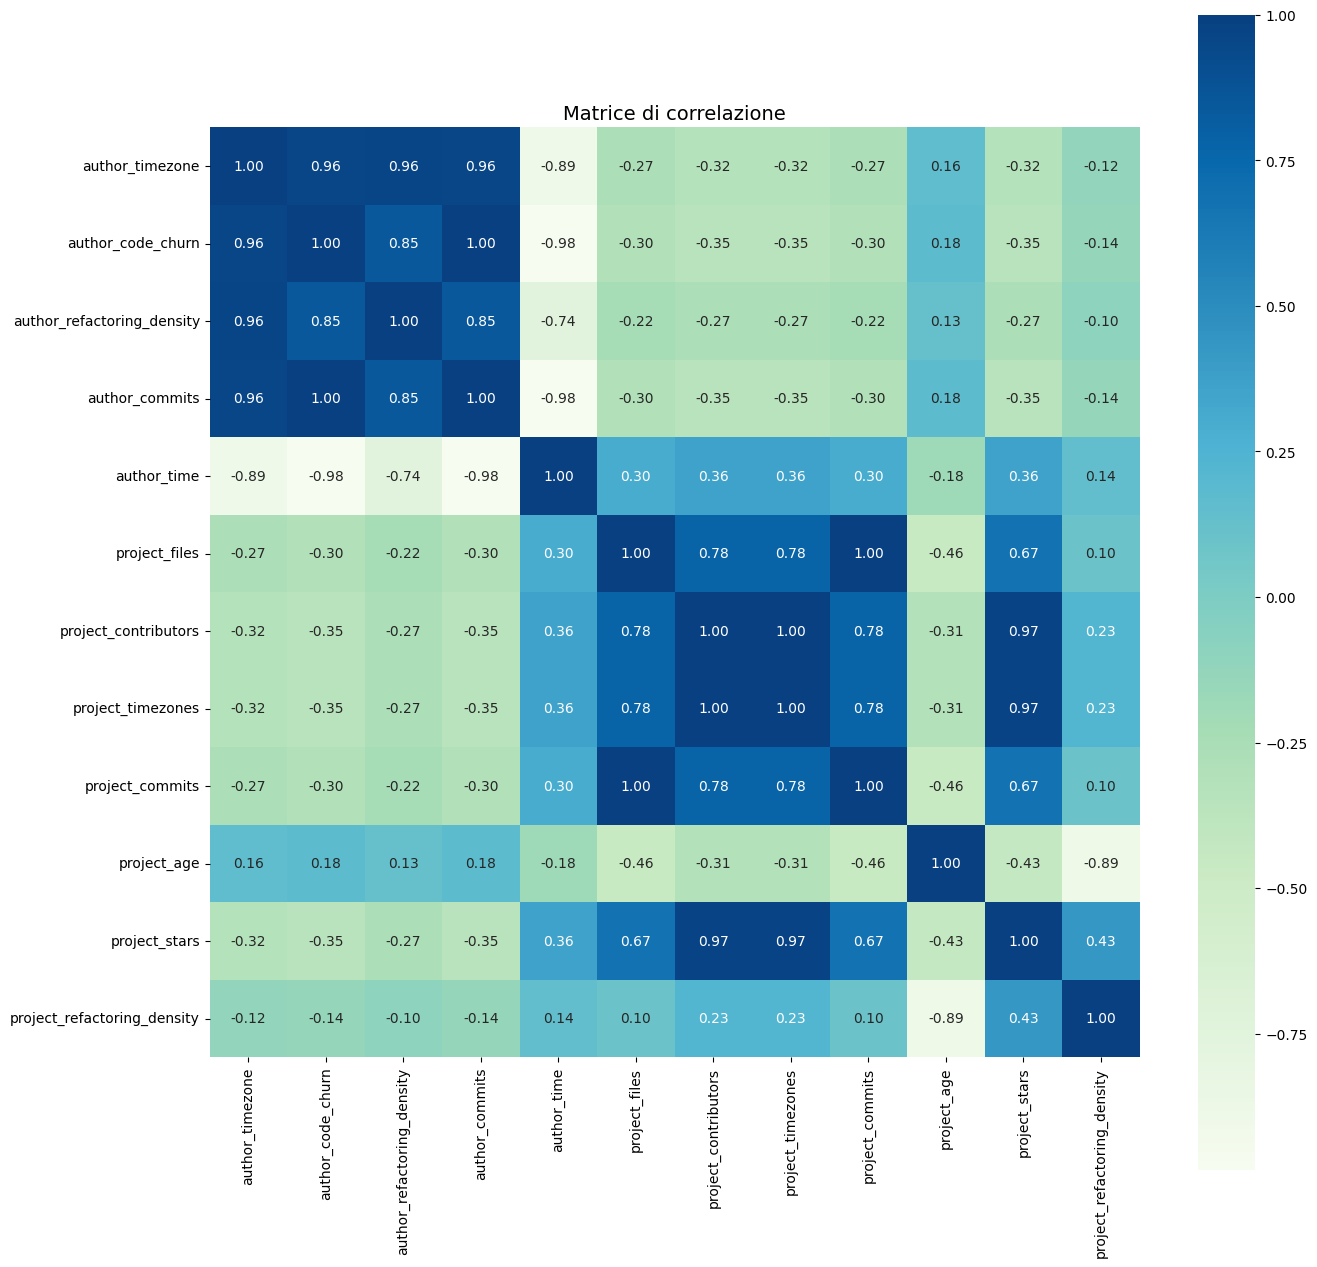

In [6]:
corr_matrix = encoded_df.corr()
plt.figure(figsize=(15,15))
plot = sns.heatmap(corr_matrix, vmax=1, square=True,annot=True, fmt='.2f', cmap='GnBu', robust=True)
plt.title('Matrice di correlazione', fontsize=14)
plt.show()

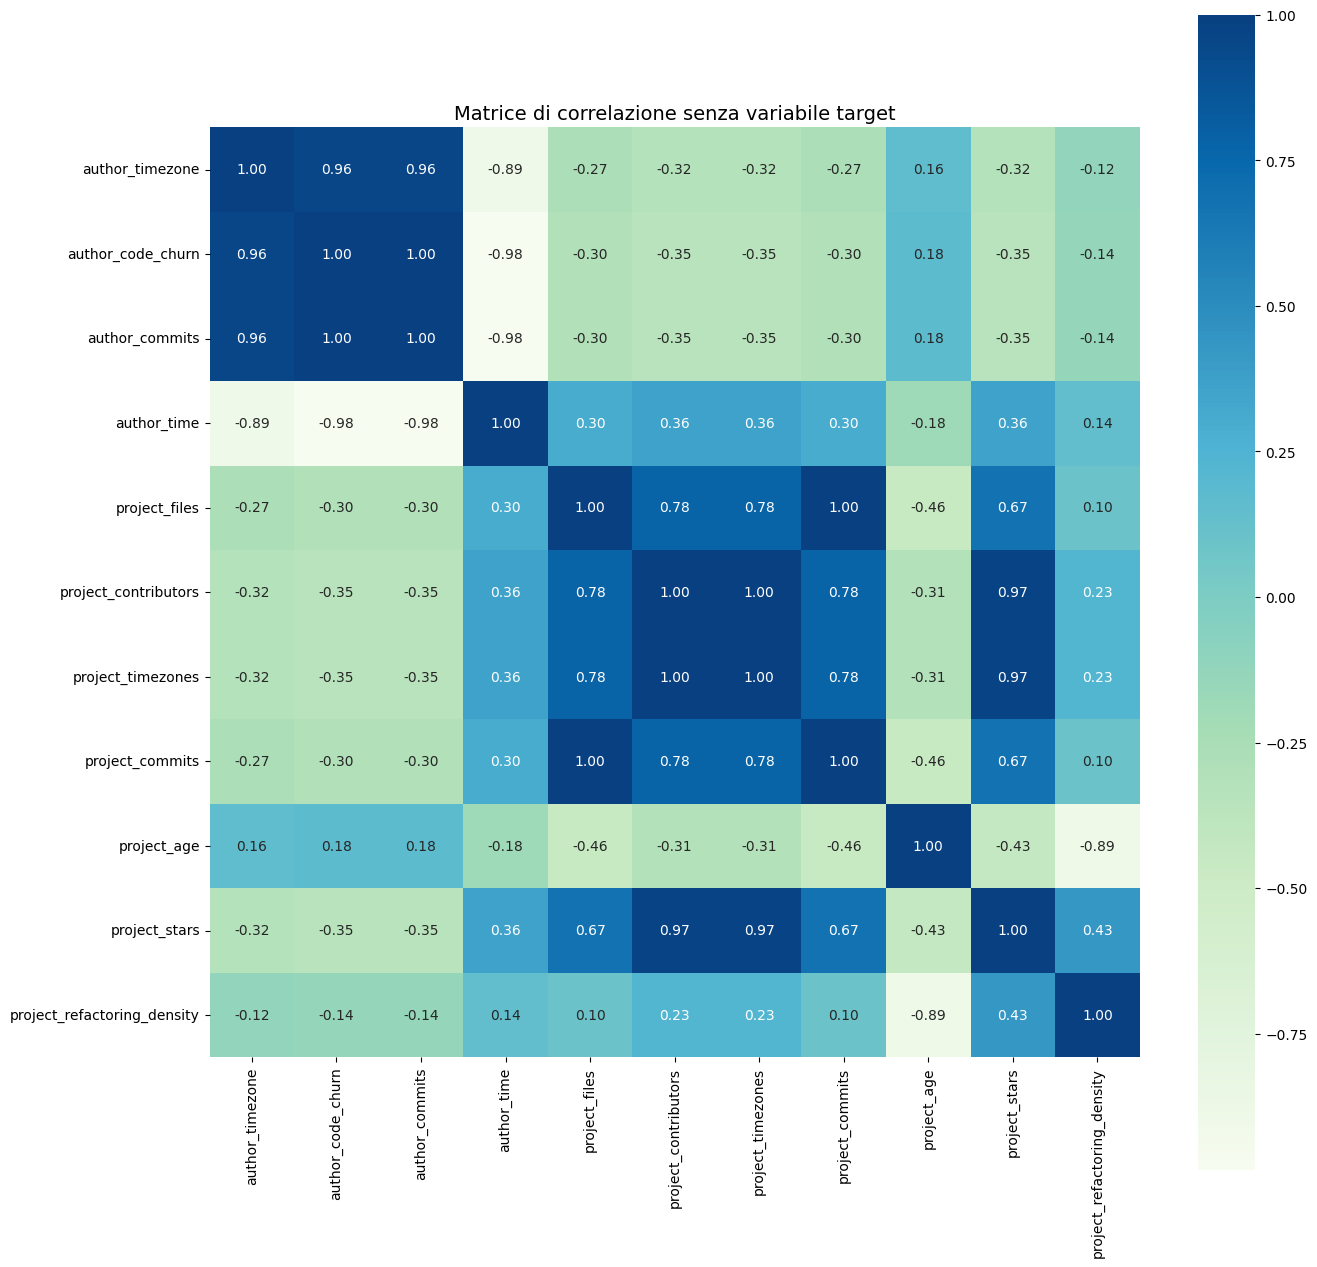

In [7]:
corr_matrix = encoded_df.drop('author_refactoring_density', axis=1).corr()
plt.figure(figsize=(15,15))
plot = sns.heatmap(corr_matrix, vmax=1, square=True,annot=True, fmt='.2f', cmap='GnBu', robust=True)
plt.title('Matrice di correlazione senza variabile target', fontsize=14)
plt.show()

# Feature Selection

In [8]:
def remove_collinear_features(df_model, target_var, threshold, verbose):
    
    # Calculate the correlation matrix
    corr_matrix = df_model.drop(target_var, axis=1).corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    dropped_feature = ""

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i + 1):
            item = corr_matrix.iloc[j:(j + 1), (i + 1):(i + 2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                if verbose:
                    print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                col_value_corr = df_model[col.values[0]].corr(df_model[target_var])
                row_value_corr = df_model[row.values[0]].corr(df_model[target_var])
                if verbose:
                    print("{}: {}".format(col.values[0], np.round(col_value_corr, 3)))
                    print("{}: {}".format(row.values[0], np.round(row_value_corr, 3)))
                if abs(col_value_corr) < abs(row_value_corr):
                    drop_cols.append(col.values[0])
                    dropped_feature = "dropped: " + col.values[0]
                else:
                    drop_cols.append(row.values[0])
                    dropped_feature = "dropped: " + row.values[0]
                if verbose:
                    print(dropped_feature)
                    print("-----------------------------------------------------------------------------")

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    df_model = df_model.drop(columns=drops)

    print("dropped columns: ")
    print(list(drops))
    print("-----------------------------------------------------------------------------")
    print("used columns: ")
    print(df_model.columns.tolist())

    print("\n")
    return df_model

new_encoded_df = remove_collinear_features(encoded_df, 'author_refactoring_density', 0.7, verbose=False)

dropped columns: 
['project_contributors', 'author_code_churn', 'author_time', 'project_files', 'project_refactoring_density', 'project_commits', 'author_commits', 'project_stars']
-----------------------------------------------------------------------------
used columns: 
['author_timezone', 'author_refactoring_density', 'project_timezones', 'project_age']




# Train Test Split

In [9]:
X = new_encoded_df.drop('author_refactoring_density', axis=1)
y = new_encoded_df['author_refactoring_density']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
new_encoded_df

,author_timezone,author_refactoring_density,project_timezones,project_age
0,1.0,3.0,2.0,3.0
1,1.0,3.0,2.0,3.0
2,1.0,3.0,2.0,3.0
3,1.0,3.0,2.0,3.0
4,1.0,3.0,2.0,3.0
...,...,...,...,...
14283,0.0,0.0,0.0,2.0
14284,0.0,0.0,0.0,2.0
14285,0.0,0.0,0.0,2.0
14286,0.0,0.0,0.0,2.0


# Decision Tree Classifier

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Migliori parametri:
╒═══════════════════╤══════════╕
│ Parametro         │ Valore   │
╞═══════════════════╪══════════╡
│ criterion         │ gini     │
├───────────────────┼──────────┤
│ max_depth         │ None     │
├───────────────────┼──────────┤
│ min_samples_leaf  │ 1        │
├───────────────────┼──────────┤
│ min_samples_split │ 2        │
├───────────────────┼──────────┤
│ random_state      │ 42       │
╘═══════════════════╧══════════╛


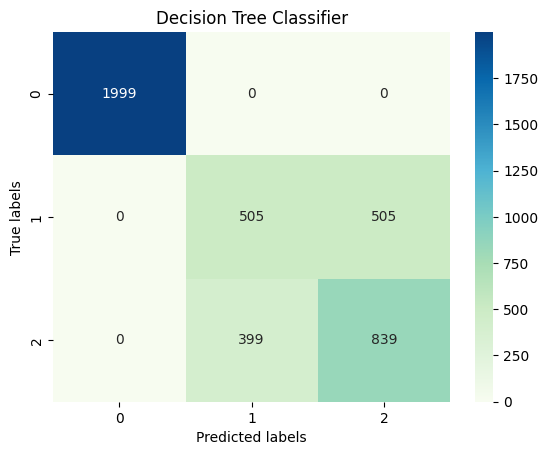

╒═════════════╤════════╕
│ Accuratezza │ 0.7871 │
├─────────────┼────────┤
│ Precisione  │ 0.7276 │
├─────────────┼────────┤
│ Richiamo    │ 0.7259 │
├─────────────┼────────┤
│ F1-Score    │ 0.7259 │
╘═════════════╧════════╛


In [15]:
def decision_tree_classifier(dataframe):
    
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'random_state': [42]
    }
    
    model = DecisionTreeClassifier()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Migliori parametri:")
    table = [[key, value if value is not None else 'None'] for key, value in best_params.items()]
    print(tabulate(table, headers=["Parametro", "Valore"], tablefmt="fancy_grid"))
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    #plt.hist([y_pred, y_test], bins=[0, 1, 2, 3, 4], label=['y_pred', 'y_test'], align='left')
    #plt.xticks([0, 1, 2, 3, 4])
    #plt.yscale('linear')
    #plt.title('Decision Tree Classifier')
    #plt.legend()
    #plt.show()

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="GnBu")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Decision Tree Classifier")
    plt.show()

    report = classification_report(y_test, y_pred)
    pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    table = [["Accuratezza", round(accuracy, 4)],
             ["Precisione", round(pr, 4)],
             ["Richiamo", round(rc, 4)],
             ["F1-Score", round(fs, 4)]]
    print(tabulate(table, tablefmt="fancy_grid"))

decision_tree_classifier(new_encoded_df)

# Random Forest Classifier

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Migliori parametri:
╒═══════════════════╤══════════╕
│ Parametro         │ Valore   │
╞═══════════════════╪══════════╡
│ criterion         │ gini     │
├───────────────────┼──────────┤
│ max_depth         │ None     │
├───────────────────┼──────────┤
│ min_samples_leaf  │ 1        │
├───────────────────┼──────────┤
│ min_samples_split │ 2        │
├───────────────────┼──────────┤
│ n_estimators      │ 50       │
├───────────────────┼──────────┤
│ random_state      │ 42       │
╘═══════════════════╧══════════╛


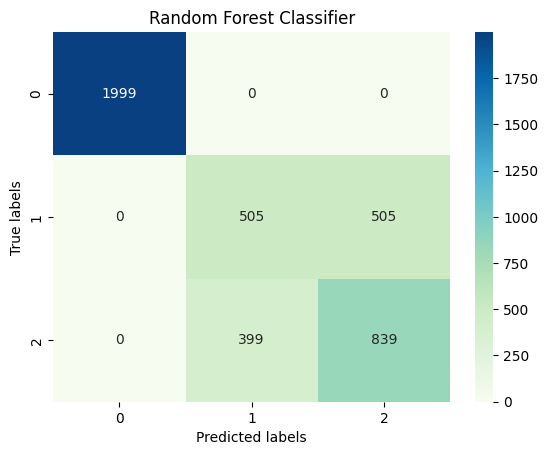

╒═════════════╤════════╕
│ Accuratezza │ 0.7871 │
├─────────────┼────────┤
│ Precisione  │ 0.7276 │
├─────────────┼────────┤
│ Richiamo    │ 0.7259 │
├─────────────┼────────┤
│ F1-Score    │ 0.7259 │
╘═════════════╧════════╛


In [16]:
def random_forest_classifier(dataframe):
    
    param_grid = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'random_state': [42]
    }
    
    model = RandomForestClassifier()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Migliori parametri:")
    table = [[key, value if value is not None else 'None'] for key, value in best_params.items()]
    print(tabulate(table, headers=["Parametro", "Valore"], tablefmt="fancy_grid"))
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    #plt.hist([y_pred, y_test], bins=[0, 1, 2, 3, 4], label=['y_pred', 'y_test'], align='left')
    #plt.xticks([0, 1, 2, 3, 4])
    #plt.yscale('linear')
    #plt.title('Random Forest Classifier')
    #plt.legend()
    #plt.show()

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="GnBu")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Random Forest Classifier")
    plt.show()

    report = classification_report(y_test, y_pred)
    pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    table = [["Accuratezza", round(accuracy, 4)],
             ["Precisione", round(pr, 4)],
             ["Richiamo", round(rc, 4)],
             ["F1-Score", round(fs, 4)]]
    print(tabulate(table, tablefmt="fancy_grid"))

random_forest_classifier(new_encoded_df)

# K-Nearest Neighbors (KNN) Classifier

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Migliori parametri:
╒═════════════╤══════════╕
│ Parametro   │ Valore   │
╞═════════════╪══════════╡
│ algorithm   │ auto     │
├─────────────┼──────────┤
│ n_neighbors │ 7        │
├─────────────┼──────────┤
│ weights     │ uniform  │
╘═════════════╧══════════╛


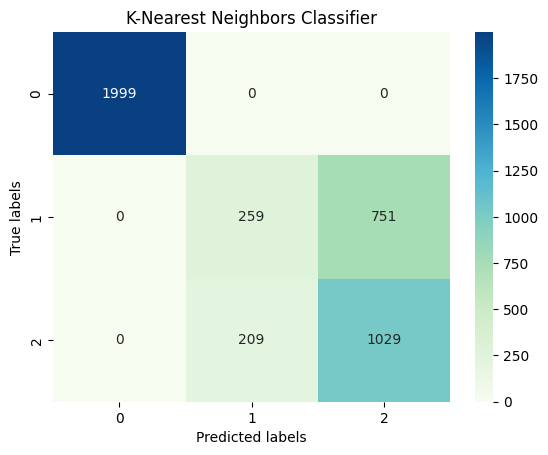

╒═════════════╤════════╕
│ Accuratezza │ 0.774  │
├─────────────┼────────┤
│ Precisione  │ 0.7105 │
├─────────────┼────────┤
│ Richiamo    │ 0.6959 │
├─────────────┼────────┤
│ F1-Score    │ 0.6775 │
╘═════════════╧════════╛


In [17]:
def knn_classifier(dataframe):
    
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
    
    model = KNeighborsClassifier()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Migliori parametri:")
    table = [[key, value if value is not None else 'None'] for key, value in best_params.items()]
    print(tabulate(table, headers=["Parametro", "Valore"], tablefmt="fancy_grid"))
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    #plt.hist([y_pred, y_test], bins=[0, 1, 2, 3, 4], label=['y_pred', 'y_test'], align='left')
    #plt.xticks([0, 1, 2, 3, 4])
    #plt.yscale('linear')
    #plt.title('K-Nearest Neighbors (KNN) Classifier')
    #plt.legend()
    #plt.show()

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="GnBu")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("K-Nearest Neighbors Classifier")
    plt.show()

    report = classification_report(y_test, y_pred)
    pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    table = [["Accuratezza", round(accuracy, 4)],
             ["Precisione", round(pr, 4)],
             ["Richiamo", round(rc, 4)],
             ["F1-Score", round(fs, 4)]]
    print(tabulate(table, tablefmt="fancy_grid"))

knn_classifier(new_encoded_df)

# Naive Bayes Classifier

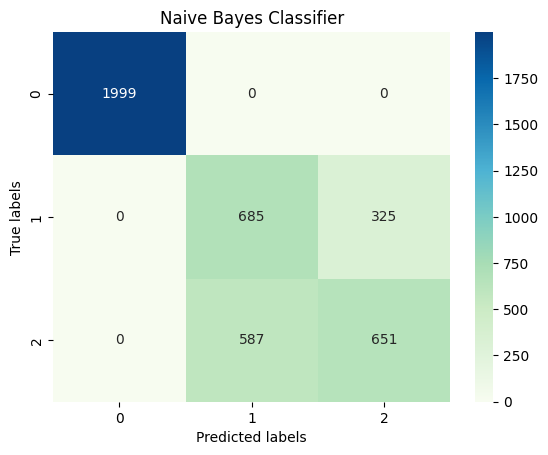

╒═════════════╤════════╕
│ Accuratezza │ 0.7853 │
├─────────────┼────────┤
│ Precisione  │ 0.7352 │
├─────────────┼────────┤
│ Richiamo    │ 0.7347 │
├─────────────┼────────┤
│ F1-Score    │ 0.7295 │
╘═════════════╧════════╛


In [13]:
def naive_bayes_classifier(dataframe):
    
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #plt.hist([y_pred, y_test], bins=[0, 1, 2, 3, 4], label=['y_pred', 'y_test'], align='left')
    #plt.xticks([0, 1, 2, 3, 4])
    #plt.yscale('linear')
    #plt.title('Naive Bayes Classifier')
    #plt.legend()
    #plt.show()

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="GnBu")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Naive Bayes Classifier")
    plt.show()

    report = classification_report(y_test, y_pred)
    pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    table = [["Accuratezza", round(accuracy, 4)],
             ["Precisione", round(pr, 4)],
             ["Richiamo", round(rc, 4)],
             ["F1-Score", round(fs, 4)]]
    print(tabulate(table, tablefmt="fancy_grid"))

naive_bayes_classifier(new_encoded_df)

# Gradient Boosting Classifier

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Migliori parametri:
╒═══════════════╤══════════╕
│ Parametro     │   Valore │
╞═══════════════╪══════════╡
│ learning_rate │      0.2 │
├───────────────┼──────────┤
│ max_depth     │      5   │
├───────────────┼──────────┤
│ n_estimators  │    100   │
├───────────────┼──────────┤
│ subsample     │      0.8 │
╘═══════════════╧══════════╛


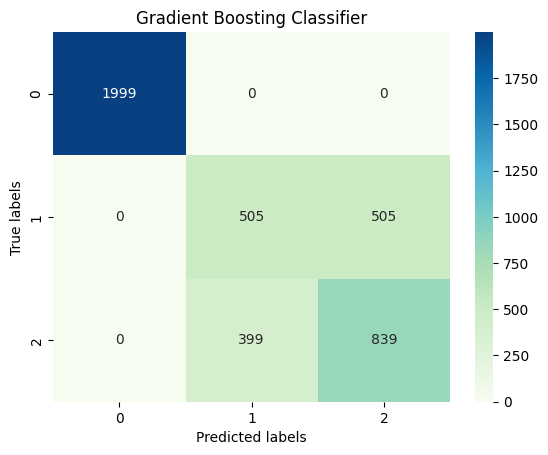

╒═════════════╤════════╕
│ Accuratezza │ 0.7871 │
├─────────────┼────────┤
│ Precisione  │ 0.7276 │
├─────────────┼────────┤
│ Richiamo    │ 0.7259 │
├─────────────┼────────┤
│ F1-Score    │ 0.7259 │
╘═════════════╧════════╛


In [18]:
def gradient_boosting_classifier(dataframe):
    
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    }
    
    model = GradientBoostingClassifier()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Migliori parametri:")
    table = [[key, value if value is not None else 'None'] for key, value in best_params.items()]
    print(tabulate(table, headers=["Parametro", "Valore"], tablefmt="fancy_grid"))
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    #plt.hist([y_pred, y_test], bins=[0, 1, 2, 3, 4], label=['y_pred', 'y_test'], align='left')
    #plt.xticks([0, 1, 2, 3, 4])
    #plt.yscale('linear')
    #plt.title('Gradient Boosting Classifier')
    #plt.legend()
    #plt.show()

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="GnBu")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Gradient Boosting Classifier")
    plt.show()

    report = classification_report(y_test, y_pred)
    pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    table = [["Accuratezza", round(accuracy, 4)],
             ["Precisione", round(pr, 4)],
             ["Richiamo", round(rc, 4)],
             ["F1-Score", round(fs, 4)]]
    print(tabulate(table, tablefmt="fancy_grid"))

gradient_boosting_classifier(new_encoded_df)